In [17]:
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory for the assignment
import os
SKELETON_DIR = '/content/drive/MyDrive/Uni/COMS4507/Project/'
os.chdir(SKELETON_DIR)


# Now go to https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD
# and select "Time Period: Max"
#            "Show:Historical Prices"
#            "Frequency:Daily"
# and click Download ---> will get BTC-USD.csv and put it in SKEL

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


           Date          Open          High           Low         Close  \
361  2023-04-19  30394.187500  30411.054688  28669.898438  28822.679688   
362  2023-04-20  28823.683594  29076.400391  28037.257813  28245.988281   
363  2023-04-21  28249.230469  28349.968750  27177.365234  27276.910156   
364  2023-04-22  27265.894531  27872.142578  27169.570313  27817.500000   
365  2023-04-23  27816.144531  27820.244141  27400.314453  27591.384766   

        Adj Close       Volume  
361  28822.679688  24571565421  
362  28245.988281  21340360360  
363  27276.910156  20759504330  
364  27817.500000  13125734602  
365  27591.384766  12785446832  
Above is data_training
Above  is data_test
Above is training_data.head())
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                           

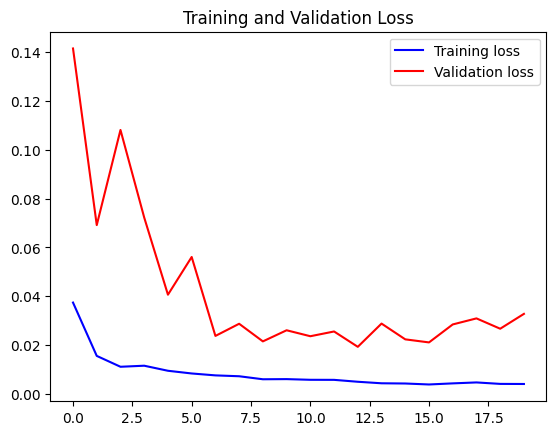

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

data = pd.read_csv(SKELETON_DIR+'BTC-USD.csv', date_parser = True)
print(data.tail())

data_training = data[data['Date']< '2023-05-01'].copy()
data_training
print("Above is data_training")

data_test = data[data['Date']< '2023-05-01'].copy()
data_test
print("Above  is data_test")


training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()
print("Above is training_data.head())")

scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))

model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)
                   
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()




1/1 [==============================] - 0s 43ms/step


<ipython-input-16-00209e5b3df1>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= part_60_days.append(data_test, ignore_index = True)


12/12 [==============================] - 1s 55ms/step


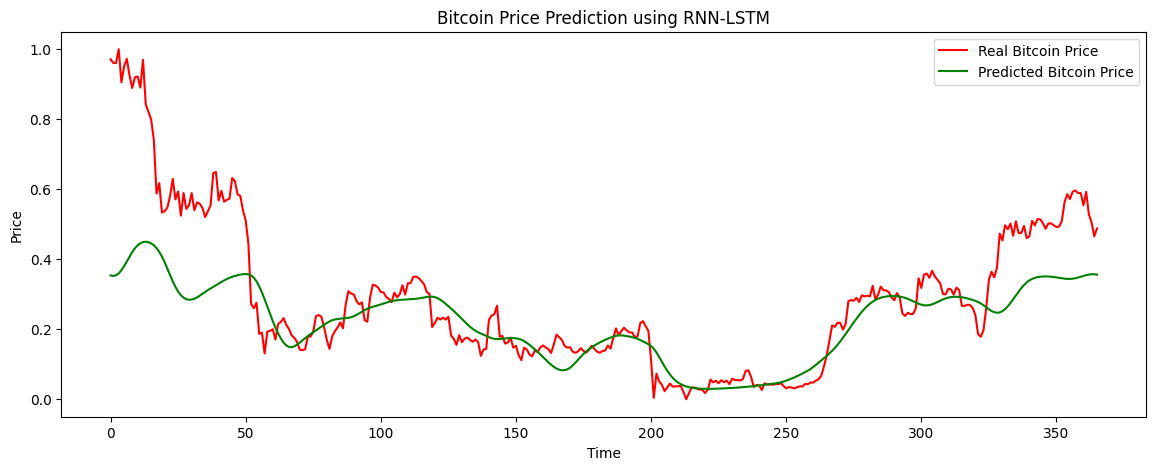

In [16]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

inputs = scaler.transform(df) 
inputs

X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 0])
    Y_pred = model.predict(np.array(X_test))

plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

